## Statistical Analysis of the Road Traffic Accidents in Switzerland

#### About the Data:
Anonymised visualisation and positioning of road traffic accidents with injury to persons since 2011. Information on the year, the month, the weekday, the time of the accident, the type of road, the type of accident and the category of severity is provided for road traffic accidents.

https://opendata.swiss/en/dataset/strassenverkehrsunfalle-mit-personenschaden

## 1) Background Information on the Analysis and Goals
According to the latest available data, 179 persons lost their lives in traffic crashes in Switzerland in 2019. This represents a 21.5% decrease on 2018. In 2018, 228 road deaths were reported – a 3.9% increase on 2017. The longer-term trend for road deaths in Switzerland has been impressive.

Our Goal is to do some Exploratory Data Analysis followed by Hypothesis testing on various factors that are related to Road Accidents and finally the prediction based on the trend we observed in the past 10 years.  

## 2) Loading and Cleaning the Data
In the following the data will be cleaned and some preliminary tests will be conducted to gain a deeper understanding of the data.

In [1]:
#import the libraries
import pandas as pd
import numpy as np
from scipy import stats
from unicodedata import normalize
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import seaborn as sns
%matplotlib inline

In [2]:
#load the data
df = pd.read_csv('data/RoadTrafficAccidentLocations.csv', encoding='utf-8')
df.MunicipalityCode = df.MunicipalityCode.astype('str').apply(lambda x: '{0:0>4}'.format(x))

In [3]:
#retriev information on the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178217 entries, 0 to 178216
Data columns (total 36 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   AccidentUID                  178217 non-null  object 
 1   AccidentType                 178217 non-null  object 
 2   AccidentType_de              178217 non-null  object 
 3   AccidentType_fr              178217 non-null  object 
 4   AccidentType_it              178217 non-null  object 
 5   AccidentType_en              178217 non-null  object 
 6   AccidentSeverityCategory     178217 non-null  object 
 7   AccidentSeverityCategory_de  178217 non-null  object 
 8   AccidentSeverityCategory_fr  178217 non-null  object 
 9   AccidentSeverityCategory_it  178217 non-null  object 
 10  AccidentSeverityCategory_en  178217 non-null  object 
 11  AccidentInvolvingPedestrian  178217 non-null  bool   
 12  AccidentInvolvingBicycle     178217 non-null  bool   
 13 

In [4]:
#check the five first rows of the dataset
df.head()

,AccidentUID,AccidentType,AccidentType_de,AccidentType_fr,AccidentType_it,AccidentType_en,AccidentSeverityCategory,AccidentSeverityCategory_de,AccidentSeverityCategory_fr,AccidentSeverityCategory_it,...,AccidentMonth_fr,AccidentMonth_it,AccidentMonth_en,AccidentWeekDay,AccidentWeekDay_de,AccidentWeekDay_fr,AccidentWeekDay_it,AccidentWeekDay_en,AccidentHour,AccidentHour_text
0,9FD6441F802C20A6E0430A865E3320A6,at0,Schleuder- oder Selbstunfall,dérapage ou perte de maîtrise,Incidente di sbandamento o per colpa propria,Accident with skidding or self-accident,as3,Unfall mit Leichtverletzten,accident avec blessés légers,Incidente con feriti leggeri,...,janvier,Gennaio,January,aw406,Samstag,samedi,Sabato,Saturday,1.0,01h-02h
1,99AE7B25356510B0E0430A865E3310B0,at4,Einbiegeunfall,accident en s'engageant sur une route,Incidente nell’immettersi in una strada,Accident when turning-into main road,as3,Unfall mit Leichtverletzten,accident avec blessés légers,Incidente con feriti leggeri,...,janvier,Gennaio,January,aw406,Samstag,samedi,Sabato,Saturday,1.0,01h-02h
2,9A096471BA579094E0430A865E339094,at00,Andere,autres,Altri,Other,as2,Unfall mit Schwerverletzten,accident avec blessés graves,Incidente con feriti gravi,...,janvier,Gennaio,January,aw406,Samstag,samedi,Sabato,Saturday,2.0,02h-03h
3,9B1F49744917E014E0430A865E33E014,at3,Abbiegeunfall,accident en quittant une route,Incidente nello svoltare,Accident when turning left or right,as3,Unfall mit Leichtverletzten,accident avec blessés légers,Incidente con feriti leggeri,...,janvier,Gennaio,January,aw406,Samstag,samedi,Sabato,Saturday,2.0,02h-03h
4,99B6C7F3285BB044E0430A865E33B044,at0,Schleuder- oder Selbstunfall,dérapage ou perte de maîtrise,Incidente di sbandamento o per colpa propria,Accident with skidding or self-accident,as2,Unfall mit Schwerverletzten,accident avec blessés graves,Incidente con feriti gravi,...,janvier,Gennaio,January,aw406,Samstag,samedi,Sabato,Saturday,2.0,02h-03h


In [5]:
#generate a new dataset that solely containts the columns in English
df = df[['AccidentUID','AccidentType','AccidentType_en','AccidentSeverityCategory','AccidentSeverityCategory_en',
         'AccidentInvolvingPedestrian','AccidentInvolvingBicycle','AccidentInvolvingMotorcycle','RoadType',
         'RoadType_en','CantonCode','MunicipalityCode','AccidentYear','AccidentMonth','AccidentMonth_en',
         'AccidentWeekDay','AccidentWeekDay_en','AccidentHour']]

In [6]:
#view first five records of the dataset
df.head()

,AccidentUID,AccidentType,AccidentType_en,AccidentSeverityCategory,AccidentSeverityCategory_en,AccidentInvolvingPedestrian,AccidentInvolvingBicycle,AccidentInvolvingMotorcycle,RoadType,RoadType_en,CantonCode,MunicipalityCode,AccidentYear,AccidentMonth,AccidentMonth_en,AccidentWeekDay,AccidentWeekDay_en,AccidentHour
0,9FD6441F802C20A6E0430A865E3320A6,at0,Accident with skidding or self-accident,as3,Accident with light injuries,False,True,False,rt433,Minor road,ZH,0261,2011,1,January,aw406,Saturday,1.0
1,99AE7B25356510B0E0430A865E3310B0,at4,Accident when turning-into main road,as3,Accident with light injuries,False,False,True,rt433,Minor road,GE,6621,2011,1,January,aw406,Saturday,1.0
2,9A096471BA579094E0430A865E339094,at00,Other,as2,Accident with severe injuries,False,True,False,rt433,Minor road,BE,0371,2011,1,January,aw406,Saturday,2.0
3,9B1F49744917E014E0430A865E33E014,at3,Accident when turning left or right,as3,Accident with light injuries,False,False,False,rt433,Minor road,BS,2701,2011,1,January,aw406,Saturday,2.0
4,99B6C7F3285BB044E0430A865E33B044,at0,Accident with skidding or self-accident,as2,Accident with severe injuries,False,False,False,rt433,Minor road,TI,5203,2011,1,January,aw406,Saturday,2.0


## 3) Deleting the missing values

In [7]:
#missing values
print(f'Total Number of records = {len(df)}')
df.isnull().sum()

Total Number of records = 178217


AccidentUID                    0
AccidentType                   0
AccidentType_en                0
AccidentSeverityCategory       0
AccidentSeverityCategory_en    0
AccidentInvolvingPedestrian    0
AccidentInvolvingBicycle       0
AccidentInvolvingMotorcycle    0
RoadType                       0
RoadType_en                    0
CantonCode                     0
MunicipalityCode               0
AccidentYear                   0
AccidentMonth                  0
AccidentMonth_en               0
AccidentWeekDay                0
AccidentWeekDay_en             0
AccidentHour                   5
dtype: int64

In [8]:
#remove missing values from dataset
df_cleaned = df.dropna(inplace=False)

print(f'Total Number of records = {len(df_cleaned)}')
df_cleaned.isnull().sum()

Total Number of records = 178212


AccidentUID                    0
AccidentType                   0
AccidentType_en                0
AccidentSeverityCategory       0
AccidentSeverityCategory_en    0
AccidentInvolvingPedestrian    0
AccidentInvolvingBicycle       0
AccidentInvolvingMotorcycle    0
RoadType                       0
RoadType_en                    0
CantonCode                     0
MunicipalityCode               0
AccidentYear                   0
AccidentMonth                  0
AccidentMonth_en               0
AccidentWeekDay                0
AccidentWeekDay_en             0
AccidentHour                   0
dtype: int64

## Visualization and Exploratory Data Analysis

<AxesSubplot:>

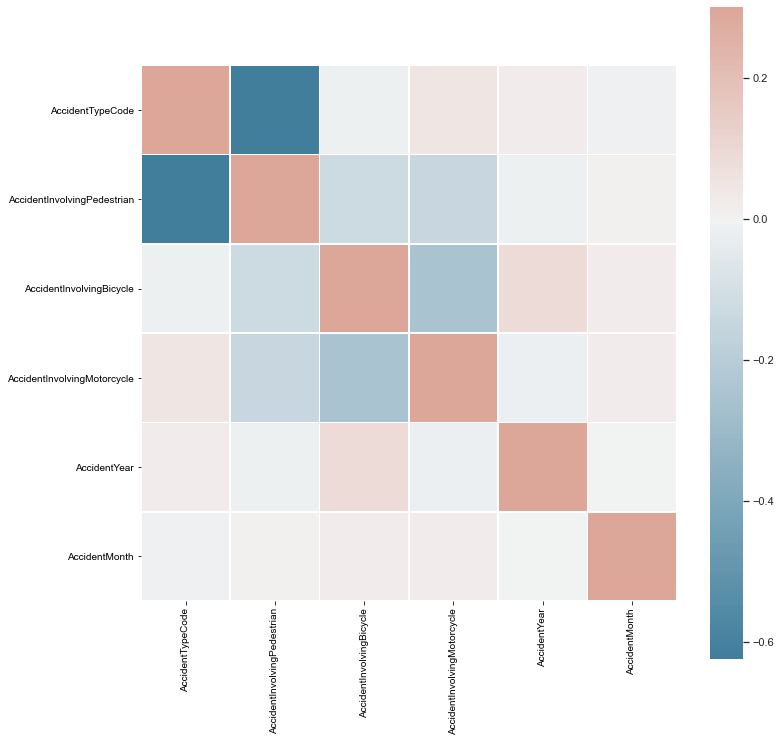

In [9]:
#correlation matrix for numeric features
vis_df = df_cleaned.copy()
vis_df.AccidentType_en =vis_df.AccidentType_en.astype('category')
vis_df['AccidentTypeCode']=vis_df.AccidentType_en.cat.codes

cols = [ 'AccidentTypeCode', 'AccidentInvolvingPedestrian', 'AccidentInvolvingBicycle', 'AccidentInvolvingMotorcycle',
         'AccidentYear', 'AccidentMonth']

size = len(cols)
figure, axes = plt.subplots(figsize=(size*2,size*2))

# pearson corellation
p_corr = vis_df[cols].corr(method='pearson')
sns.set_theme(style="white")
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(p_corr, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, ax=axes)

In [10]:
#accident by canton
vis_df = df_cleaned[['AccidentType_en','AccidentSeverityCategory_en','CantonCode','MunicipalityCode','AccidentYear','AccidentMonth_en','AccidentHour','AccidentUID']].copy()

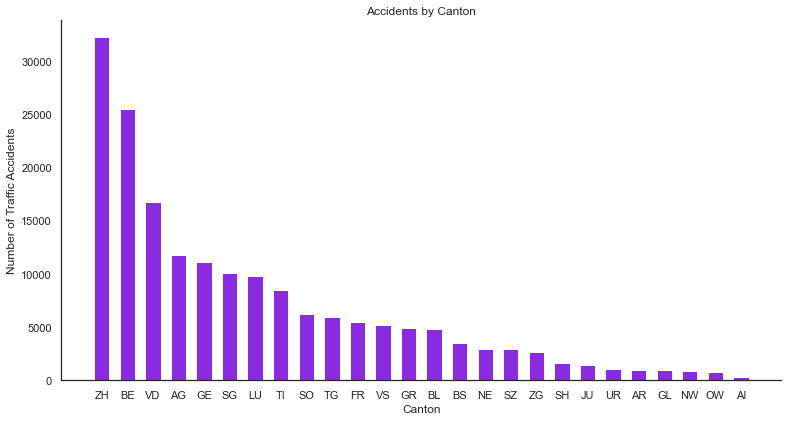

In [11]:
temp_df = vis_df.groupby(['CantonCode']).size().reset_index(name='Accident Count').sort_values(by=['Accident Count'], ascending=False)
x = temp_df['CantonCode'].tolist()
y = temp_df['Accident Count'].tolist()
fig = plt.figure(figsize = (10, 5))
ax = fig.add_axes([0,0,1,1])
ax.bar(x,y,width = 0.6,color="blueviolet")

#remove the right and top line of the frame
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.ylabel("Number of Traffic Accidents")
plt.xlabel("Canton")
plt.title("Accidents by Canton")

#plt.hist(x,color = 'g', lw=0)
plt.show()
#it seems that the most accidents happen in the canton of Zurich

#### Municipality codes were replaced with municipality names.
#### Codes were retrieved from: https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwjWrd65ivXyAhX2gf0HHXIdAI0QFnoECAMQAQ&url=https%3A%2F%2Fwww.bfs.admin.ch%2Fbfsstatic%2Fdam%2Fassets%2F342939%2Fmaster&usg=AOvVaw3wO4Aehd533Hkk-PKWB2ju

C:\Users\maria\anaconda3\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


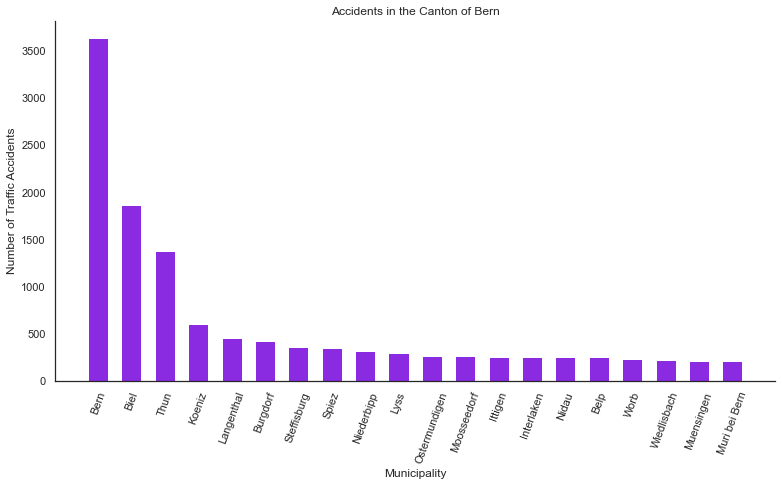

In [12]:
#accidents by muncipalities in the canton of Bern
temp_df = vis_df[vis_df['CantonCode']=='BE']

#replace municipality codes with municipality names:
temp_df["MunicipalityCode"].replace({"0306":"Lyss","0329":"Langenthal","0351":"Bern","0355":"Koeniz",
                                     "0356":"Muri bei Bern","0362":"Ittigen","0363":"Ostermundigen","0371":"Biel",
                                     "0404":"Burgdorf","0544":"Moosseedorf","0581":"Interlaken",
                                     "0616":"Muensingen","0627":"Worb","0743":"Nidau","0768":"Spiez",
                                     "0861":"Belp","0939":"Steffisburg","0942":"Thun","0981":"Niederbipp",
                                     "0995":"Wiedlisbach"}, inplace=True)

temp_df = temp_df.groupby(['MunicipalityCode']).size().reset_index(name='Accident Count').sort_values(by=['Accident Count'], ascending=False)
temp_df = temp_df[temp_df['Accident Count']>200]
x = temp_df['MunicipalityCode'].tolist()
y = temp_df['Accident Count'].tolist()
fig = plt.figure(figsize = (10, 5))
ax = fig.add_axes([0,0,1,1])
ax.bar(x,y,width = 0.6,color="blueviolet")

#remove the right and top line of the frame
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.xticks(rotation=70)

plt.ylabel("Number of Traffic Accidents")
plt.xlabel("Municipality")
plt.title("Accidents in the Canton of Bern")

plt.show()

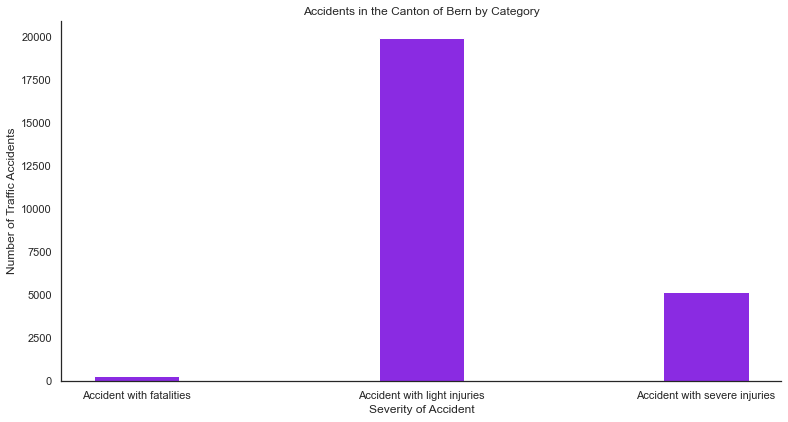

In [13]:
#accident by types in the canton of Bern
temp_df = vis_df[vis_df['CantonCode']=='BE']
temp_df = temp_df.groupby(['AccidentSeverityCategory_en']).size().reset_index(name='Accident Count')
x = temp_df['AccidentSeverityCategory_en'].tolist()
y = temp_df['Accident Count'].tolist()
fig = plt.figure(figsize = (10, 5))
ax = fig.add_axes([0,0,1,1])
ax.bar(x,y,width = 0.3,color="blueviolet")

#remove the right and top line of the frame
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.ylabel("Number of Traffic Accidents")
plt.xlabel("Severity of Accident")
plt.title("Accidents in the Canton of Bern by Category")

plt.show()

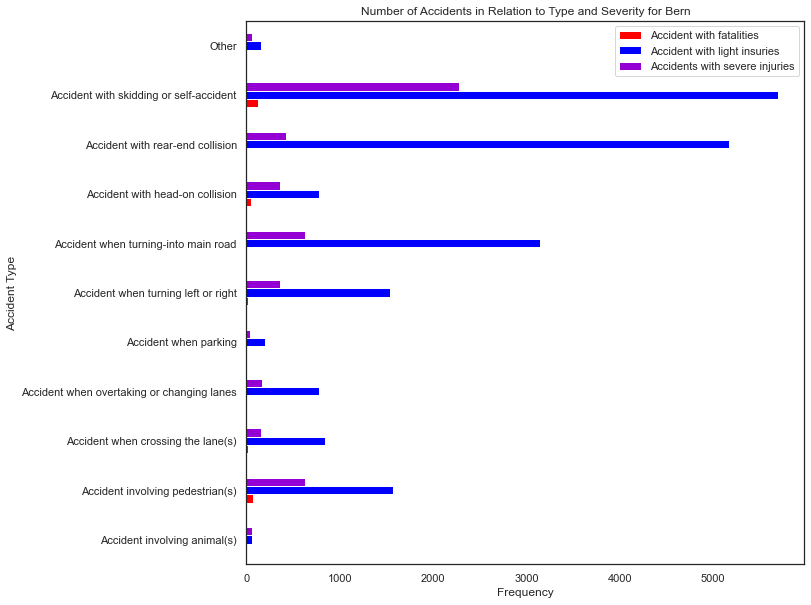

In [14]:
#plot the frame
plt.rcParams["figure.figsize"] = (10, 10)

#plot the data
temp_df = vis_df[vis_df['CantonCode']=='BE']
c=['red','blue','darkviolet']
temp_df.groupby('AccidentSeverityCategory_en').AccidentType_en.value_counts().unstack(0).plot.barh(color=c);

#rename the axis and labels
plt.ylabel('Accident Type')
plt.xlabel('Frequency')
plt.title('Number of Accidents in Relation to Type and Severity for Bern')
plt.legend(["Accident with fatalities","Accident with light insuries","Accidents with severe injuries"])

plt.show()

KeyError: 'Accident Count'

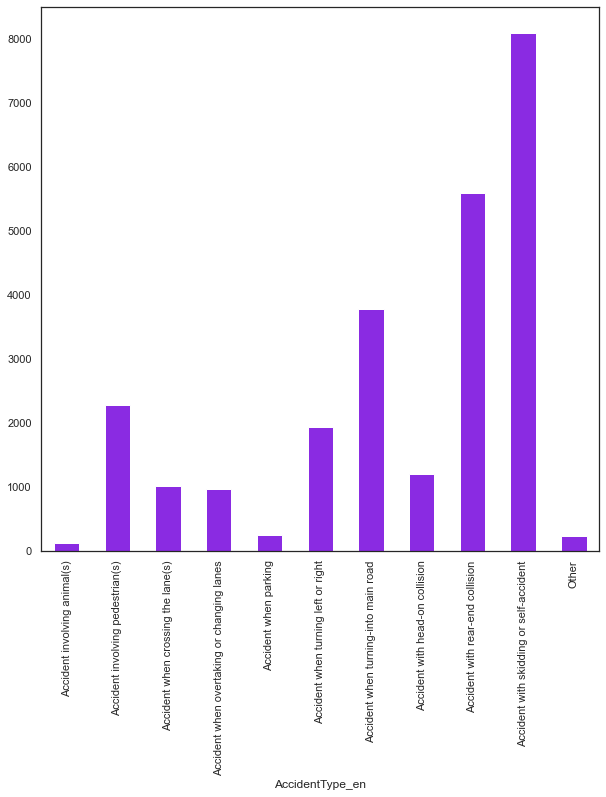

In [15]:
#visualize number of accidents per type in Bern
vis_df[vis_df['CantonCode']=='BE'].groupby('AccidentType_en').size().plot.bar(color="blueviolet")
temp_df = temp_df[temp_df['Accident Count']>200]
#labeling the axis
plt.ylabel('Frequency')
plt.xlabel('Accident Type')
plt.title('Number of Accidents per Type in Bern')
plt.xticks(rotation=70);

<AxesSubplot:>

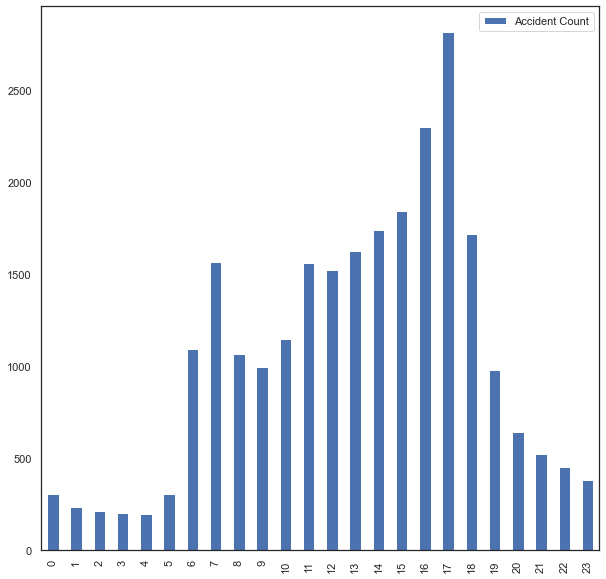

In [16]:
df_cleaned[df_cleaned['CantonCode']=='BE'].groupby('AccidentHour').size().reset_index(name=
                        'Accident Count').plot.bar(y='Accident Count')


In [17]:
df_cleaned[df_cleaned['CantonCode']=='BE'].groupby('AccidentWeekDay_en').size().reset_index(name='Accident Count').sort_values(by=['Accident Count'], ascending=False)

,AccidentWeekDay_en,Accident Count
0,Friday,4226
6,Wednesday,3916
4,Thursday,3850
5,Tuesday,3741
1,Monday,3675
2,Saturday,3423
3,Sunday,2604


In [18]:
df_cleaned[df_cleaned['CantonCode']=='BE'].groupby(['AccidentYear','AccidentMonth_en']).size().reset_index(name='Accident Count')

,AccidentYear,AccidentMonth_en,Accident Count
0,2011,April,232
1,2011,August,303
2,2011,December,208
3,2011,February,167
4,2011,January,160
...,...,...,...
115,2020,March,131
116,2020,May,222
117,2020,November,186
118,2020,October,223


In [26]:
df_cleaned1=df_cleaned[['CantonCode','AccidentYear','AccidentInvolvingPedestrian','AccidentInvolvingBicycle','AccidentInvolvingMotorcycle']]

In [24]:
df_cleaned1[df_cleaned1['CantonCode']=='BE'].groupby(['AccidentYear']).sum()

,AccidentInvolvingPedestrian,AccidentInvolvingBicycle,AccidentInvolvingMotorcycle
AccidentYear,,,
2011,257,597,504
2012,261,591,442
2013,254,590,407
2014,251,656,422
2015,242,662,419
2016,234,644,374
2017,217,685,437
2018,228,815,413
2019,225,709,373


In [19]:
df_cleaned[df_cleaned['CantonCode']=='BE'].groupby(['AccidentYear']).sum()

,AccidentInvolvingPedestrian,AccidentInvolvingBicycle,AccidentInvolvingMotorcycle,AccidentMonth,AccidentHour
AccidentYear,,,,,
2011,257,597,504,17825,35000.0
2012,261,591,442,17438,33870.0
2013,254,590,407,16953,31959.0
2014,251,656,422,17053,33058.0
2015,242,662,419,17285,33712.0
2016,234,644,374,16796,32142.0
2017,217,685,437,17725,34746.0
2018,228,815,413,18303,36262.0
2019,225,709,373,16906,33341.0


## 4) Introducing and Analyzing the Hypothesis

### H1: Accidents in Zurich are in general more severe than accidents in Bern.
Test the hypothesis using scatterplots and histograms.
Two sample test.

In [ ]:
#H1 Testing
#Accidents in ZH by severity
df_cleaned[df_cleaned['CantonCode']=='ZH'].groupby('AccidentSeverityCategory_en').size().reset_index(name='Accident Count')

In [ ]:
#accidents in BE by severity
df_cleaned[df_cleaned['CantonCode']=='BE'].groupby('AccidentSeverityCategory_en').size().reset_index(name='Accident Count')

In [ ]:
#df_cleaned[(df_cleaned['CantonCode'] == 'BE') & (df_cleaned['CantonCode'] == 'ZH')]
canton_list = ['BE','ZH']
df_cantons = df_cleaned[df_cleaned.CantonCode.isin(canton_list)]

df_cantons.groupby('AccidentSeverityCategory_en').CantonCode.value_counts().unstack(0).plot.barh(color=c);

#rename the axis and labels
plt.ylabel('Canton')
plt.xlabel('Frequency')
plt.title('Number of Accidents in Relation to Severity for Bern and Zurich')
plt.legend(["Accident with fatalities","Accident with light insuries","Accidents with severe injuries"]);

#### H1 seems to be true since there are more severe accidents in Zurich than in Bern. But more fatalities in Bern

### H2: The time of the year has an impact on the severity of the accident. Accidents that happen in Q1 and Q4 are generally more severe. 
One sample test.

In [ ]:
#H2 Testing
#group the months by quarters
def quarter (row):
   if row['AccidentMonth_en'] == 'January' :
      return 'Q1 and Q4'
   if row['AccidentMonth_en'] == 'February' :
      return 'Q1 and Q4'
   if row['AccidentMonth_en'] == 'March' :
      return 'Q1 and Q4'
   if row['AccidentMonth_en'] == 'April' :
      return 'Q2 and Q3'
   if row['AccidentMonth_en'] == 'May' :
      return 'Q2 and Q3'
   if row['AccidentMonth_en'] == 'June':
      return 'Q2 and Q3'
   if row['AccidentMonth_en']  == 'July':
      return 'Q2 and Q3'
   if row['AccidentMonth_en'] == 'August':
      return 'Q2 and Q3'
   if row['AccidentMonth_en'] == 'September':
      return 'Q2 and Q3'
   if row['AccidentMonth_en'] == 'October' :
      return 'Q1 and Q4'
   if row['AccidentMonth_en'] == 'November':
      return 'Q1 and Q4'
   if row['AccidentMonth_en']  == 'December':
      return 'Q1 and Q4'    
   return 'Other'

#add a new column called quarter to the dataset
df_cleaned['quarter'] = df.apply (lambda row: quarter(row), axis=1)

df_cleaned.groupby('AccidentSeverityCategory_en').quarter.value_counts().unstack(0).plot.barh(color=c);

#rename the axis and labels
plt.ylabel('Quarter')
plt.xlabel('Frequency')
plt.title('Severity of Accidents by Quarter')
plt.legend(["Accident with fatalities","Accident with light insuries","Accidents with severe injuries"]);

In [ ]:
#group the months by quarters
def quarter (row):
   if row['AccidentMonth_en'] == 'January' :
      return 'Q1'
   if row['AccidentMonth_en'] == 'February' :
      return 'Q1'
   if row['AccidentMonth_en'] == 'March' :
      return 'Q1'
   if row['AccidentMonth_en'] == 'April' :
      return 'Q2'
   if row['AccidentMonth_en'] == 'May' :
      return 'Q2'
   if row['AccidentMonth_en'] == 'June':
      return 'Q2'
   if row['AccidentMonth_en']  == 'July':
      return 'Q3'
   if row['AccidentMonth_en'] == 'August':
      return 'Q3'
   if row['AccidentMonth_en'] == 'September':
      return 'Q3'
   if row['AccidentMonth_en'] == 'October' :
      return 'Q4'
   if row['AccidentMonth_en'] == 'November':
      return 'Q4'
   if row['AccidentMonth_en']  == 'December':
      return 'Q4'    
   return 'Other'

#add a new column called quarter to the dataset
df_cleaned['quarter'] = df.apply (lambda row: quarter(row), axis=1)

df_cleaned.groupby('AccidentSeverityCategory_en').quarter.value_counts().unstack(0).plot.barh(color=c);

#rename the axis and labels
plt.ylabel('Quarter')
plt.xlabel('Frequency')
plt.title('Severity of Accidents by Quarter')
plt.legend(["Accident with fatalities","Accident with light insuries","Accidents with severe injuries"]);

#### H2 does not seem to be true. There seem to be more severe accidents in quarters 2 and 3 than in quarters 1 and 4.

### H3: Average fatal Accidents per canton is equal to Average fatal Accidents in Bern
### H0: Null Hypothesis would be, Average fatal Accidents per canton is not equal to that of Bern.

After the null hypothesis testing we will be able to conclude if Bern is one of the safer cantons of Switzerland.

For this we need to calculate the mean of Accidents with fatalities and then divide it by the number of cantons. This will give us the Average fatal Accidents per canton. The sample mean.

To evaluate the hypothesis, we will use Two Sample tTest.

In [27]:
#H3 Testing
df_hypothesis = df_cleaned.copy()
#keeping the 'Accidents with fatalities' values only
df_hypothesis = df[df['AccidentSeverityCategory_en'] == 'Accident with fatalities']
df_hypothesis.head()


,AccidentUID,AccidentType,AccidentType_en,AccidentSeverityCategory,AccidentSeverityCategory_en,AccidentInvolvingPedestrian,AccidentInvolvingBicycle,AccidentInvolvingMotorcycle,RoadType,RoadType_en,CantonCode,MunicipalityCode,AccidentYear,AccidentMonth,AccidentMonth_en,AccidentWeekDay,AccidentWeekDay_en,AccidentHour
23,A7017A5EAF2C000AE0430A839427000A,at0,Accident with skidding or self-accident,as1,Accident with fatalities,False,False,False,rt432,Principal road,ZH,0191,2011,1,January,aw407,Sunday,4.0
26,9FC309470799D0B4E0430A865E33D0B4,at0,Accident with skidding or self-accident,as1,Accident with fatalities,False,False,False,rt433,Minor road,FR,2129,2011,1,January,aw407,Sunday,10.0
79,9AD144B2BA813044E0430A865E333044,at0,Accident with skidding or self-accident,as1,Accident with fatalities,False,False,False,rt433,Minor road,GE,6629,2011,1,January,aw402,Tuesday,6.0
89,98153E733C4700FEE0430A865E3300FE,at0,Accident with skidding or self-accident,as1,Accident with fatalities,False,False,False,rt433,Minor road,NE,6456,2011,1,January,aw402,Tuesday,15.0
105,A7016BAAF12700F2E0430A83942700F2,at4,Accident when turning-into main road,as1,Accident with fatalities,False,True,False,rt433,Minor road,ZH,0053,2011,1,January,aw403,Wednesday,11.0


In [28]:
#Average number of fatal Accidents per canton in Switzerland
df_hypothesis.groupby(['AccidentYear']).size().mean()/26

9.211538461538462

In [29]:
df_hypothesis_bern = df_hypothesis[df_hypothesis['CantonCode']=='BE']

df_hypothesis_bern.head()

,AccidentUID,AccidentType,AccidentType_en,AccidentSeverityCategory,AccidentSeverityCategory_en,AccidentInvolvingPedestrian,AccidentInvolvingBicycle,AccidentInvolvingMotorcycle,RoadType,RoadType_en,CantonCode,MunicipalityCode,AccidentYear,AccidentMonth,AccidentMonth_en,AccidentWeekDay,AccidentWeekDay_en,AccidentHour
293,9BAC5E61007570EAE0430A865E3370EA,at6,Accident with head-on collision,as1,Accident with fatalities,False,False,False,rt432,Principal road,BE,0952,2011,1,January,aw401,Monday,7.0
686,9B1F48828BC87050E0430A865E337050,at0,Accident with skidding or self-accident,as1,Accident with fatalities,False,False,False,rt433,Minor road,BE,0546,2011,1,January,aw403,Wednesday,7.0
779,9ADCFAA98CEF50EAE0430A865E3350EA,at0,Accident with skidding or self-accident,as1,Accident with fatalities,False,False,False,rt433,Minor road,BE,0496,2011,1,January,aw404,Thursday,22.0
999,9BFF547225BAC0F0E0430A865E33C0F0,at5,Accident when crossing the lane(s),as1,Accident with fatalities,False,False,False,rt432,Principal road,BE,0351,2011,1,January,aw404,Thursday,14.0
1239,9C0BA243AF21A024E0430A865E33A024,at0,Accident with skidding or self-accident,as1,Accident with fatalities,False,False,False,rt430,Motorway,BE,0942,2011,2,February,aw404,Thursday,15.0


#### Two sample tTest

In [30]:
import statsmodels.api as sm
from scipy import stats

df_hypothesis.AccidentType_en = df_hypothesis.AccidentType_en.astype('category')
df_hypothesis['AccidentTypeCode'] = df_hypothesis.AccidentType_en.cat.codes
df_hypothesis_bern.AccidentType_en = df_hypothesis_bern.AccidentType_en.astype('category')
df_hypothesis_bern['AccidentTypeCode'] = df_hypothesis_bern.AccidentType_en.cat.codes

C:\Users\maria\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
<ipython-input-30-23fa6c8a2fac>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hypothesis['AccidentTypeCode'] = df_hypothesis.AccidentType_en.cat.codes
<ipython-input-30-23fa6c8a2fac>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

In [31]:
stats.ttest_ind(df_hypothesis['AccidentTypeCode'],df_hypothesis_bern['AccidentTypeCode'], equal_var = False, alternative='two-sided')

Ttest_indResult(statistic=0.3455304860978335, pvalue=0.7298681233798292)

Since the p-value is greater than 0.05, we can not reject the null hypothesis. This means that we can conclude that the Average number of fatal accidents per canton is not equal to that of Bern, and Bern is among the 'not-so-safe' cantons of switzerland.

But there could be various other considerations that need to be taken into account. The area of the region and the population of the canton can bias the stats.

## 5) Predictions for the Future and Outlook

In [32]:
df_pred = df_cleaned.copy()
df_pred.head()

,AccidentUID,AccidentType,AccidentType_en,AccidentSeverityCategory,AccidentSeverityCategory_en,AccidentInvolvingPedestrian,AccidentInvolvingBicycle,AccidentInvolvingMotorcycle,RoadType,RoadType_en,CantonCode,MunicipalityCode,AccidentYear,AccidentMonth,AccidentMonth_en,AccidentWeekDay,AccidentWeekDay_en,AccidentHour
0,9FD6441F802C20A6E0430A865E3320A6,at0,Accident with skidding or self-accident,as3,Accident with light injuries,False,True,False,rt433,Minor road,ZH,0261,2011,1,January,aw406,Saturday,1.0
1,99AE7B25356510B0E0430A865E3310B0,at4,Accident when turning-into main road,as3,Accident with light injuries,False,False,True,rt433,Minor road,GE,6621,2011,1,January,aw406,Saturday,1.0
2,9A096471BA579094E0430A865E339094,at00,Other,as2,Accident with severe injuries,False,True,False,rt433,Minor road,BE,0371,2011,1,January,aw406,Saturday,2.0
3,9B1F49744917E014E0430A865E33E014,at3,Accident when turning left or right,as3,Accident with light injuries,False,False,False,rt433,Minor road,BS,2701,2011,1,January,aw406,Saturday,2.0
4,99B6C7F3285BB044E0430A865E33B044,at0,Accident with skidding or self-accident,as2,Accident with severe injuries,False,False,False,rt433,Minor road,TI,5203,2011,1,January,aw406,Saturday,2.0


In [33]:
yearvsfatalities=df_pred[df_pred['CantonCode']=='BE'].groupby(['AccidentYear','AccidentSeverityCategory_en']).size().reset_index(name='Count')
yearvsfatalities=yearvsfatalities[yearvsfatalities['AccidentSeverityCategory_en']=='Accident with fatalities']
yearvsfatalities

,AccidentYear,AccidentSeverityCategory_en,Count
0,2011,Accident with fatalities,61
3,2012,Accident with fatalities,37
6,2013,Accident with fatalities,26
9,2014,Accident with fatalities,23
12,2015,Accident with fatalities,35
15,2016,Accident with fatalities,30
18,2017,Accident with fatalities,37
21,2018,Accident with fatalities,34
24,2019,Accident with fatalities,21
27,2020,Accident with fatalities,23


Now we can see some trend of fatal Accidents from 2011 to 2020. The number of accidents keep decreasing. For simplicity we have taken only Bern canton

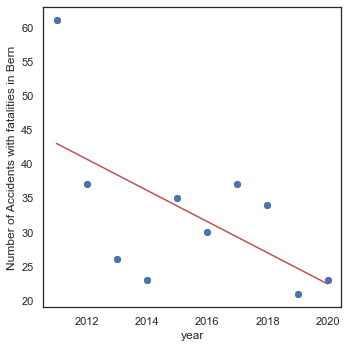

In [34]:
color=np.repeat(np.array(['red', 'purple']), [20, 20], axis=0)

plt.figure(figsize=(5  ,5))
x=yearvsfatalities['AccidentYear']
y=yearvsfatalities['Count']

gradient, intercept, r_value, p_value, std_err = stats.linregress(x,y)
mn=np.min(x)
mx=np.max(x)
x1=np.linspace(mn,mx,500)
y1=gradient*x1+intercept
plt.plot(x,y,'ob')
plt.plot(x1,y1,'-r')

plt.scatter(x,y)
plt.xlabel('year')
plt.ylabel('Number of Accidents with fatalities in Bern')



plt.tight_layout(h_pad=1, w_pad=2)
plt.show()

Once we get the gradient and intercept, we can predict any data point with the linear regression. For future years, we input the year and get the possible number of fatal accidents as per our prediction.

In [35]:
#predicting number of accidents in Bern in 2022
result= gradient*2022+intercept
result

17.848484848484077

But this is not an ideal fit. As we have few number of points (10 in this case), the regression line is not best fitted. To solve this problem, we gather more points by combining year data with quarters and then have more points corresponding to different quarters of the years where Accidents happened.

### 5.1) Regression 1: Relationship between Quarters of the Year and Number of Fatal Accidents

Linear Regression on QuarterAndYear with number of Accidents (to have more points)

In [41]:
df_newpred = df_pred[df_pred['AccidentSeverityCategory_en']=='Accident with fatalities'][['AccidentMonth','AccidentYear','CantonCode']]
df_newpred['QuaterAndYear'] = df_newpred.apply (lambda row: row['AccidentYear']*100 + (row['AccidentMonth']-1)//3 + 1, axis=1 )
df_newpred = df_newpred.drop(columns=['AccidentMonth','AccidentYear'])
df_newpred = df_newpred[df_newpred['CantonCode']=='BE'].groupby(['QuaterAndYear']).size().reset_index(name='Count')
df_newpred.head(10)

,QuaterAndYear,Count
0,201101,15
1,201102,11
2,201103,18
3,201104,17
4,201201,8
5,201202,9
6,201203,7
7,201204,13
8,201301,2
9,201302,10


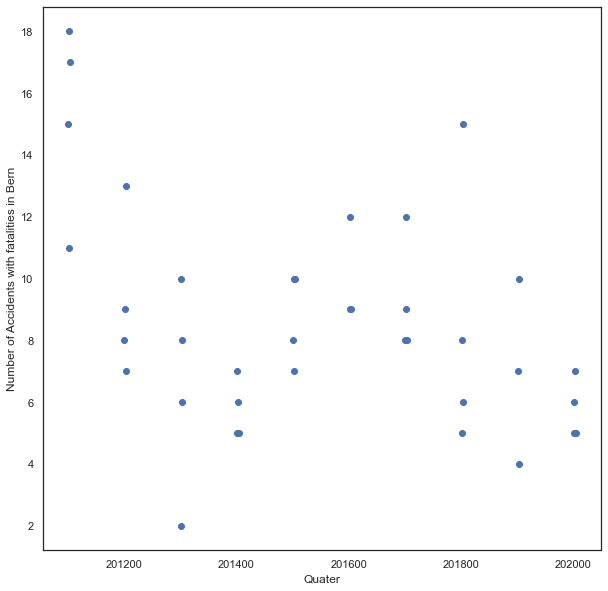

In [37]:
x=df_newpred['QuaterAndYear']
y=df_newpred['Count']
plt.scatter(x,y)
plt.xlabel('Quater')
plt.ylabel('Number of Accidents with fatalities in Bern')
plt.show()

Text(0, 0.5, 'Number of Fatal Accidents in Bern')

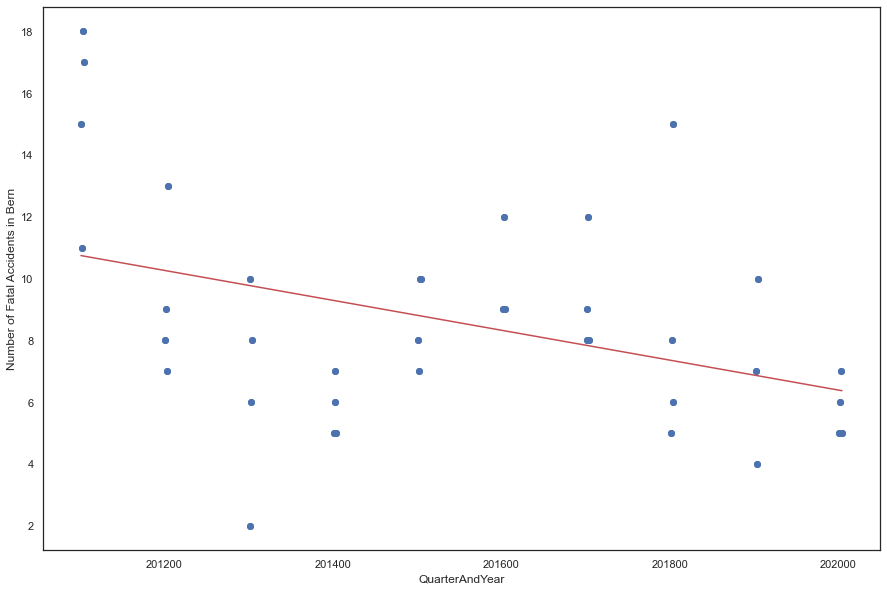

In [38]:
plt.figure(figsize=(15  ,10))
x=df_newpred['QuaterAndYear']
y=df_newpred['Count']

gradient, intercept, r_value, p_value, std_err = stats.linregress(x,y)
mn=np.min(x)
mx=np.max(x)
x1=np.linspace(mn,mx,500)
y1=gradient*x1+intercept
plt.plot(x,y,'ob')
plt.plot(x1,y1,'-r')

plt.scatter(x,y)
plt.xlabel('QuarterAndYear')
plt.ylabel('Number of Fatal Accidents in Bern')

In [39]:
#predicting number of accidents in Bern in first quarter of 2024
result= gradient*202401+intercept
result

4.444638995345258

### 5.2) Regression 2: Relationship between Amount of Rain and the Number of Accidents per Month and Year

In [ ]:
#create a new data subset with all accidents in ZH from 2011 to 2020
df_zh = df_cleaned.copy()
df_zh = df_zh[df_zh.CantonCode == 'ZH']
df_zh = df_zh[df_zh['AccidentYear'].isin([2011,2012,2013,2014,2015,2016,2017,2018,2019,2020])]
df_zh = df_zh[['AccidentType_en','AccidentSeverityCategory_en','CantonCode','AccidentYear','AccidentMonth','AccidentWeekDay',
               'AccidentWeekDay_en','AccidentHour']]

df_zh['AccidentMonth'] = df_zh['AccidentMonth'].astype('str')
df_zh['AccidentMonth'] = df_zh['AccidentMonth'].str.zfill(2)
df_zh = df_zh.rename(columns={'AccidentMonth': 'month'})

#add a new column to consolidate year and month
df_zh['YearMonth'] = df_zh.apply(lambda x: '%s-%s' % (x['AccidentYear'],x['month']), axis = 1)
df_zh

In [ ]:
#number of accidents per month
df_zh_count = df_zh.groupby('YearMonth').size().reset_index(name='Accident Count')
df_zh_count

### Load a new dataset with weather data for Zurich in 2020

In [ ]:
#load a new dataset with weather data in Zurich in 2020
url20 = "https://data.stadt-zuerich.ch/dataset/ugz_meteodaten_tagesmittelwerte/download/ugz_ogd_meteo_d1_2020.csv"
df_weather20 = pd.read_csv(url20)
df_weather20 = df_weather20[df_weather20.Parameter == 'RainDur']

#split the date into year, month and day format
pd.to_datetime(df_weather20['Datum'])
df_weather20[["year", "month", "day"]] = df_weather20["Datum"].str.split("-", expand = True)
df_weather20['YearMonth'] = df_weather20.apply(lambda x: '%s-%s' % (x['year'],x['month']), axis = 1)

#create a new dataset with the total of rain per month for 2020
df_rain20 = df_weather20.groupby(df_weather20.YearMonth).sum()
df_rain20.reset_index(level=0, inplace=True)

### Load a new dataset with weather data for Zurich in 2019

In [ ]:
#load weather data for Zurich in 2019
url19 = "https://data.stadt-zuerich.ch/dataset/ugz_meteodaten_tagesmittelwerte/download/ugz_ogd_meteo_d1_2019.csv"
df_weather19 = pd.read_csv(url19)
df_weather19 = df_weather19[df_weather19.Parameter == 'RainDur']

#split the date into year, month and day format
pd.to_datetime(df_weather19['Datum'])
df_weather19[["year", "month", "day"]] = df_weather19["Datum"].str.split("-", expand = True)
df_weather19['YearMonth'] = df_weather19.apply(lambda x: '%s-%s' % (x['year'],x['month']), axis = 1)

#create a new dataset with the total of rain per month for 2019
df_rain19 = df_weather19.groupby(df_weather19.YearMonth).sum()
df_rain19.reset_index(level=0, inplace=True)

### Load a new dataset with weather data for Zurich in 2018

In [ ]:
#load weather data for Zurich in 2018
url18 = "https://data.stadt-zuerich.ch/dataset/ugz_meteodaten_tagesmittelwerte/download/ugz_ogd_meteo_d1_2018.csv"
df_weather18 = pd.read_csv(url18)
df_weather18 = df_weather18[df_weather18.Parameter == 'RainDur']

#split the date into year, month and day format
pd.to_datetime(df_weather18['Datum'])
df_weather18[["year", "month", "day"]] = df_weather18["Datum"].str.split("-", expand = True)
df_weather18['YearMonth'] = df_weather18.apply(lambda x: '%s-%s' % (x['year'],x['month']), axis = 1)

#create a new dataset with the total of rain per month for 2018
df_rain18 = df_weather18.groupby(df_weather18.YearMonth).sum()
df_rain18.reset_index(level=0, inplace=True)

### Load a new dataset with weather data for Zurich in 2017

In [ ]:
#load weather data for Zurich in 2017
url17 = "https://data.stadt-zuerich.ch/dataset/ugz_meteodaten_tagesmittelwerte/download/ugz_ogd_meteo_d1_2017.csv"
df_weather17 = pd.read_csv(url17)
df_weather17 = df_weather17[df_weather17.Parameter == 'RainDur']

#split the date into year, month and day format
pd.to_datetime(df_weather17['Datum'])
df_weather17[["year", "month", "day"]] = df_weather17["Datum"].str.split("-", expand = True)
df_weather17['YearMonth'] = df_weather17.apply(lambda x: '%s-%s' % (x['year'],x['month']), axis = 1)

#create a new dataset with the total of rain per month for 2017
df_rain17 = df_weather17.groupby(df_weather17.YearMonth).sum()
df_rain17.reset_index(level=0, inplace=True)

### Load a new dataset with weather data for Zurich in 2016

In [ ]:
#load weather data for Zurich in 2016
url16 = "https://data.stadt-zuerich.ch/dataset/ugz_meteodaten_tagesmittelwerte/download/ugz_ogd_meteo_d1_2016.csv"
df_weather16 = pd.read_csv(url16)
df_weather16 = df_weather16[df_weather16.Parameter == 'RainDur']

#split the date into year, month and day format
pd.to_datetime(df_weather16['Datum'])
df_weather16[["year", "month", "day"]] = df_weather16["Datum"].str.split("-", expand = True)
df_weather16['YearMonth'] = df_weather16.apply(lambda x: '%s-%s' % (x['year'],x['month']), axis = 1)

#create a new dataset with the total of rain per month for 2016
df_rain16 = df_weather16.groupby(df_weather16.YearMonth).sum()
df_rain16.reset_index(level=0, inplace=True)

### Load a new dataset with weather data for Zurich in 2015

In [ ]:
#load weather data for Zurich in 2015
url15 = "https://data.stadt-zuerich.ch/dataset/ugz_meteodaten_tagesmittelwerte/download/ugz_ogd_meteo_d1_2015.csv"
df_weather15 = pd.read_csv(url15)
df_weather15 = df_weather15[df_weather15.Parameter == 'RainDur']

#split the date into year, month and day format
pd.to_datetime(df_weather15['Datum'])
df_weather15[["year", "month", "day"]] = df_weather15["Datum"].str.split("-", expand = True)
df_weather15['YearMonth'] = df_weather15.apply(lambda x: '%s-%s' % (x['year'],x['month']), axis = 1)

#create a new dataset with the total of rain per month for 2015
df_rain15 = df_weather15.groupby(df_weather15.YearMonth).sum()
df_rain15.reset_index(level=0, inplace=True)

### Load a new dataset with weather data for Zurich in 2014

In [ ]:
#load weather data for Zurich in 2014
url14 = "https://data.stadt-zuerich.ch/dataset/ugz_meteodaten_tagesmittelwerte/download/ugz_ogd_meteo_d1_2014.csv"
df_weather14 = pd.read_csv(url14)
df_weather14 = df_weather14[df_weather14.Parameter == 'RainDur']

#split the date into year, month and day format
pd.to_datetime(df_weather14['Datum'])
df_weather14[["year", "month", "day"]] = df_weather14["Datum"].str.split("-", expand = True)
df_weather14['YearMonth'] = df_weather14.apply(lambda x: '%s-%s' % (x['year'],x['month']), axis = 1)

#create a new dataset with the total of rain per month for 2014
df_rain14 = df_weather14.groupby(df_weather14.YearMonth).sum()
df_rain14.reset_index(level=0, inplace=True)

### Load a new dataset with weather data for Zurich in 2013

In [ ]:
#load weather data for Zurich in 2013
url13 = "https://data.stadt-zuerich.ch/dataset/ugz_meteodaten_tagesmittelwerte/download/ugz_ogd_meteo_d1_2013.csv"
df_weather13 = pd.read_csv(url13)
df_weather13 = df_weather13[df_weather13.Parameter == 'RainDur']

#split the date into year, month and day format
pd.to_datetime(df_weather13['Datum'])
df_weather13[["year", "month", "day"]] = df_weather13["Datum"].str.split("-", expand = True)
df_weather13['YearMonth'] = df_weather13.apply(lambda x: '%s-%s' % (x['year'],x['month']), axis = 1)

#create a new dataset with the total of rain per month for 2013
df_rain13 = df_weather13.groupby(df_weather13.YearMonth).sum()
df_rain13.reset_index(level=0, inplace=True)

### Load a new dataset with weather data for Zurich in 2012

In [ ]:
#load weather data for Zurich in 2012
url12 = "https://data.stadt-zuerich.ch/dataset/ugz_meteodaten_tagesmittelwerte/download/ugz_ogd_meteo_d1_2012.csv"
df_weather12 = pd.read_csv(url12)
df_weather12 = df_weather12[df_weather12.Parameter == 'RainDur']

#split the date into year, month and day format
pd.to_datetime(df_weather12['Datum'])
df_weather12[["year", "month", "day"]] = df_weather12["Datum"].str.split("-", expand = True)
df_weather12['YearMonth'] = df_weather12.apply(lambda x: '%s-%s' % (x['year'],x['month']), axis = 1)

#create a new dataset with the total of rain per month for 2012
df_rain12 = df_weather12.groupby(df_weather12.YearMonth).sum()
df_rain12.reset_index(level=0, inplace=True)

### Load a new dataset with weather data for Zurich in 2011

In [ ]:
#load weather data for Zurich in 2011
url11 = "https://data.stadt-zuerich.ch/dataset/ugz_meteodaten_tagesmittelwerte/download/ugz_ogd_meteo_d1_2011.csv"
df_weather11 = pd.read_csv(url11)
df_weather11 = df_weather11[df_weather11.Parameter == 'RainDur']

#split the date into year, month and day format
pd.to_datetime(df_weather11['Datum'])
df_weather11[["year", "month", "day"]] = df_weather11["Datum"].str.split("-", expand = True)
df_weather11['YearMonth'] = df_weather11.apply(lambda x: '%s-%s' % (x['year'],x['month']), axis = 1)

#create a new dataset with the total of rain per month for 2011
df_rain11 = df_weather11.groupby(df_weather11.YearMonth).sum()
df_rain11.reset_index(level=0, inplace=True)

### Consolidation of weather data from 2011 to 2020 for Zurich

In [ ]:
df_rain = pd.concat([df_rain11, df_rain12, df_rain13, df_rain14, df_rain15, df_rain16, 
                     df_rain17, df_rain18, df_rain19, df_rain20])
df_rain

### Consolidation of weather and accident data from 2011 to 2020 for Zurich

In [ ]:
#merge the two datasets df_zh_count and df_rain
df_merged = pd.merge(df_zh_count, df_rain, on='YearMonth')
df_merged = df_merged.rename(columns={'month':'Month','Wert':'Amount of Rain'})
df_merged

#### Regression

In [ ]:
#Regression: the impact of rain on the total amount of accidents per month
rain = df_merged['Amount of Rain']
acc  = df_merged['Accident Count']
slope, intercept, r_value, p_value, std_err = stats.linregress(rain,acc)
print (slope, intercept)

print ('%1.2f +- %1.2f' % (slope,std_err))

ax = df_merged.plot(x='Amount of Rain',y='Accident Count',kind="scatter",c='c')
plt.plot(rain, intercept + slope*rain, 'b', label='Fitted treated line')
plt.show()
p_value

#### The results appear to be significant (p-value = 0.0001196) and imply that the amount of rain has a negative effect on the number of accidents.

In [ ]:
#change the type from float to integer
df_merged['Amount of Rain'] = df_merged['Amount of Rain'].astype('int64')

In [ ]:
#create a subset out of the df_merged dataset
df_merged_new = df_merged.copy()
df_merged_new = df_merged_new[['Accident Count','Amount of Rain']]

In [ ]:
#t-test statistic
stats.ttest_1samp(a=df_merged_new,popmean=2.3, alternative='two-sided')

#the p-value is very small which is hard to interpret.

In [ ]:
#sign-test statistic
import statsmodels.stats.descriptivestats as dstat
dstat.sign_test(df_merged_new, mu0=3.3)

## 6) Conclusion
Text